<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/stats_textbook_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 3 파이썬을 이용한 데이터 분석

## 3.6 정규분포와 응용

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
# 소수점 자리수 설정 (3자리)
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

### 3.6.2 확률밀도

정규분포의 확률밀도함수

$N(x|\mu, \sigma^2) = \dfrac {1} {\sqrt{2 \pi \sigma^2}}e\Big\{ - \dfrac {(x-\mu)^2} {2 \sigma^2}  \Big\}$

- 위 식에는 원주율 $\pi$ 와 자연로그 밑 $e$ 의 지수가 들어있음

In [2]:
# 원주율 파이
print('원주율 파이:', sp.pi)

print('자연로그 밑 e (scipy):', sp.exp(1)) # 자연로그 밑 e
print('자연로그 밑 e (numpy):', np.exp(1))

원주율 파이: 3.141592653589793
자연로그 밑 e (scipy): 2.718281828459045
자연로그 밑 e (numpy): 2.718281828459045


<ipython-input-2-2158aebab8c2>:4: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  print('자연로그 밑 e (scipy):', sp.exp(1)) # 자연로그 밑 e


In [3]:
print('평균 4, 분산 0.64 (표준편차 0.8) 인 정규분포에 대해 확률변수가 3일 때의 확률밀도')
print('즉, N(3 | 4, 0.8^2)은 아래와 같이 계산 가능')
x = 3
mu = 4
sigma = 0.8

print('확률밀도:', 1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
                       sp.exp(-((x - mu)**2) / (2 * sigma**2)) 
     )

# scipy.stats 함수를 이용하면 위 계산을 간단하게 할 수 있음
# loc : 평균, scale:표준편차, x: 확률변수
print('확률밀도(scipy):', stats.norm.pdf(loc=4, scale=0.8, x=3)) 

평균 4, 분산 0.64 (표준편차 0.8) 인 정규분포에 대해 확률변수가 3일 때의 확률밀도
즉, N(3 | 4, 0.8^2)은 아래와 같이 계산 가능
확률밀도: 0.22831135673627742
확률밀도(scipy): 0.2283113567362774


<ipython-input-3-11922cc74f85>:7: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  print('확률밀도:', 1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
<ipython-input-3-11922cc74f85>:8: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(-((x - mu)**2) / (2 * sigma**2))


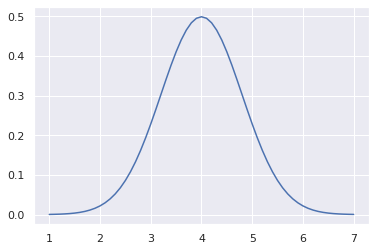

In [4]:
# 평균 4, 편차:0.8, 확률변수 1부터 7까지 0.1 step
x_plot = np.arange(start=1, stop=7.1, step=0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=mu, scale=sigma))

### 3.6.4 누적분포함수
확률변수 X에 대해 x가 실수라고 했을 때 [식3-13]과 같이 되는 F(X)를 **누적분포함수** 또는 **분포함수**라고 한다.

$F(X) = P(X \le x)$      $\qquad\qquad \qquad \qquad$ (식3-13)

누적분포함수는 `stats.norm`의 `cdf` 함수를 사용함.
`cdf`는 **Cumulative Distribution Function** 의 약자


모집단분포가 $N(x | 4, 0.8^2)$ 일때 확률분포에서 얻은 확률변수가 3 이하가 될 확률을 계산

In [6]:
# 약 10%
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

## 3.9 평균값과 차이 검정

In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

In [32]:
# 약 먹기 전과 먹은 후의 체온차이
person = ['A', 'B', 'C',   'D',   'E', 'A', 'B', 'C', 'D', 'E']
medicine = ['BF', 'BF', 'BF', 'BF', 'BF', 'AF', 'AF', 'AF', 'AF', 'AF']
body_temp = [36.2, 36.2, 35.3, 36.1, 36.1, 36.8, 36.1, 36.8, 37.1, 36.9]
df = pd.DataFrame({'person':person, 'medicine': medicine, 'body_temp':body_temp})
display(df.head())

# 귀무가설 : 약을 먹기전과 후의 체온이 변하지 않는다.
# 대립가설 : 약을 먼기 전과 후의 체온이 다르다.
# 유의수준 5%

before = df[df['medicine']=='BF']['body_temp']
after = df[df['medicine']=='AF']['body_temp']

print('기존 type:', type(before))

# 시리즈는 단순 빼기로 인덱스별 빼기가 안됨
diff = np.array(after) - np.array(before)
print(diff)

# diff의 평균값이 0과 다른지 1집단 t검정으로 알아보는 것
ttest_1samp_result = stats.ttest_1samp(diff, 0)
print(ttest_1samp_result)

# ttest_real을 이용하여 간단하게 검정가능
ttest_rel_result = stats.ttest_rel(np.array(after), np.array(before))
print(ttest_rel_result)
print('p 값이 0.05보다 작으므로 약을 먹기전과 후의 체온은 유의미한 차이가 있다고 주장할 수 있다.')

,person,medicine,body_temp
0,A,BF,36.2
1,B,BF,36.2
2,C,BF,35.3
3,D,BF,36.1
4,E,BF,36.1


기존 type: <class 'pandas.core.series.Series'>
[ 0.6 -0.1  1.5  1.   0.8]
Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)
Ttest_relResult(statistic=2.901693483620596, pvalue=0.044043109730074276)
p 값이 0.05보다 작으므로 약을 먹기전과 후의 체온은 유의미한 차이가 있다고 주장할 수 있다.
